In [1]:
from sklearn.datasets import load_iris # scikit-learn의 샘플 데이터 로드를 위해 import

iris = load_iris()

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston, load_iris
from sklearn.linear_model import LinearRegression,Ridge, SGDRegressor # SGDRegressor은 학습 나머지는 공식
from sklearn.neural_network import MLPRegressor # MLPRegressor은 딥러닝 학습
from sklearn.metrics import r2_score # 선형 모델(Linear Models)

from sklearn.model_selection import train_test_split

In [ ]:
##### 1장. 데이터 샘플링


##### 2절 | R을 이용한 표본 추출

##### 1. 단순 임의 추출
## Q) iris 데이터로 분석을 진행하기 위해 전체 데이터의 7:3의 비율로
## training data와 test data를 추출한 뒤 새로운 변수에 저장해보자. 
## (데이터 추출 방법은 단순 임의 비복원 추출을 이용한다.)

In [5]:
iris_df = pd.DataFrame(  iris['data'], columns=iris['feature_names'])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [25]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
y_data = iris.target
x_data = iris.data

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,
                                                    test_size = 0.7,random_state=1)

In [17]:
x_test.shape

(105, 4)

In [ ]:
##### 2. 층화 임의 추출
## Q) iris 데이터에서 Species가 setosa인 데이터를 20개, versicolor인 데이터를 15개, 
## versinica인 데이터를 15개씩 단순 임의 추출을 사용해 추출해보자.

## 개수를 어떻게 맞추는가? 
##층화는 원래 기존 그룹별 비율 그대로해야하는게 아닌가?

In [39]:
x_train, x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=2/3, shuffle=True,
                                   stratify=y_data,random_state=1004)
print('X_train shape:', x_train.shape)
print('X_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)
y_train

X_train shape: (50, 4)
X_test shape: (100, 4)
y_train shape: (50,)
y_test shape: (100,)


array([1, 1, 0, 1, 0, 0, 2, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 0, 1, 1, 2,
       2, 0, 2, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 2, 1, 0, 1, 0, 2, 0, 1, 0,
       2, 2, 0, 2, 2, 2])

In [ ]:
##### 2장. T-검정(T-Test)


##### 1절 | 일표본 T-검정(One Sample T-Test)

## Q) MASS패키지의 cats 데이터는 고양이들의 성별(Sex 변수), 
## 몸무게(Bwt 변수), 심장의 무게(Hwt 변수)를 담고있다. 
## cats 데이터에서 고양이들의 평균몸무게가 2.6kg인지 아닌지에 대한
## 통계적 검정을 수행하고, 결과를 해석해보자.


In [ ]:

##### 2절 | 대응표본 T-검정(Paired Sample T-Test)

## Q) 10명의 환자를 대상으로 수면영양제를 복용하기 전과 후의 수면시간을 측정하여 
## 영양제의 효과가 있는지를 판단하고자 한다. 
## 영양제 복용 전과 후의 평균 수면시간에 차이가 있는지를 알아보는데, 
## 단측검정을 수행하여 영양제 복용 후에 수면시간이 더 늘어났는지를 검정해보자. 
## 수면영양제를 복용하기 전과 후의 수면시간은 아래에 제시된 바와 같다. 
## (표본이 정규성을 만족한다는 가정 하에 단측검정 수행, 유의수준 = 0.05)


In [65]:
x1=[7, 3, 4, 5, 2, 1, 6, 6, 5, 4]
x2=[8, 4, 5, 6, 2, 3, 6, 8, 6, 5]

x_data = pd.DataFrame()
x_data['before'] = x1
x_data['after'] = x2
x_data['diff'] = (x_data.after-x_data.before )

from scipy.stats import ttest_1samp
ttest_1samp(x_data['diff'], 0)

# import scipy.stats
# scipy.stats.ttest_ind(x_data['diff'],0)

Ttest_1sampResult(statistic=4.743416490252569, pvalue=0.0010538712570165528)

In [63]:
shapiro(x_data['diff'])

NameError: name 'shapiro' is not defined

In [ ]:
##### 3절 | 독립표본 T-검정( Sample T-Test)

## Q) MASS패키지의 cats 데이터는 고양이들의 성별(Sex 변수), 몸무게(Bwt 변수), 
## 심장의 무게(Hwt 변수)를 담고있다. 고양이들의 성별(Sex)에 따른 몸무게(Bwt)의 평균은 
## 통계적으로 다르다고 할 수 있는지에 대한 검정을 수행하고, 결과를 해석해보자. 

## 검정을 수행하기에 앞서 설정할 수 있는 가설은 아래와 같다.
## 귀무가설 : 고양이의 성별에 따른 평균 몸무게에는 통계적으로 유의한 차이가 없다.
## 대립가설 : 고양이의 성별에 따른 평균 몸무게에는 통계적으로 유의한 차이가 있다.

In [ ]:
##### 3장. 교차분석


##### 2절 | 적합성 검정
## Q) MASS 패키지의 survey 데이터에서 W.Hnd 변수는 설문 응답자가 
## 왼손잡이(Left) 인지 오른손잡이(Right) 인지를 나타낸다. 
## R을 이용하여 W.Hnd 변수에 대한 분할표를 생성하고, 아래와 같은 가설에 대한 적합도 검정을 수행해보자.

## 귀무가설 : 전체 응답자 중 왼손잡이의 비율이 20%, 오른손잡이의 비율이 80%이다.
## 대립가설 : 전체 응답자 중 왼손잡이의 비율이 20%, 오른손잡이의 비율이 80%라고 할 수 없다.


In [ ]:
##### 3절 | 독립성 검정
## Q) MASS 패키지의 survey 데이터에서 Exer 변수는 설문 응답자가 
## 얼마나 자주 운동을 하는지에 대해 Freq(자주), Some(약간), None(하지 않음)의 범주로 
## 값을 저장하고 있다. W.Hnd 변수는 설문 응답자가 왼손잡이인지 오른손 잡이인지에 대해 
## Left(왼손잡이), Right(오른손 잡이)의 두 가지 범주로 값을 가지고 있다. 
## 주로 사용하는 손과 운동의 빈도가 서로 독립인지를 확인하기 위해 분할표를 생성하고, 
## 아래의 가설에 대한 독립성 검정을 수행해보자.

## 귀무가설 : W.Hnd(주로 사용하는 손)과 Exer(운동 빈도)는 독립이다.
## 대립가설 : W.Hnd(주로 사용하는 손)과 Exer(운동 빈도)는 독립이 아니다.


In [ ]:
##### 4장. 분산분석 (ANOVA)


##### 1절 | 일원배치 분산분석
## Q) R에 내장되어 있는 iris 데이터를 이용하여 종(Species)별로 
## 꽃받침의 폭(Sepal.Width)의 평균이 같은지 
## 혹은 차이가 있는지를 확인하기 위해 일원배치 분산분석을 수행해보자.


In [85]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels.stats.multicomp as mc

from sklearn.datasets import load_iris 
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=['SepalLength','SepalWidth','PetalLength','PetalWidth'])
iris_df['Species'] = iris.target

fit = ols(formula='SepalWidth ~ C(Species)', data=iris_df).fit()
anova_lm(fit)

,df,sum_sq,mean_sq,F,PR(>F)
C(Species),2.0,11.344933,5.672467,49.16004,4.492017e-17
Residual,147.0,16.962000,0.115388,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     0      1     0.93 0.001 0.6862 1.1738   True
     0      2    1.582 0.001 1.3382 1.8258   True
     1      2    0.652 0.001 0.4082 0.8958   True
-------------------------------------------------


C:\Users\jeongheun\anaconda3\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


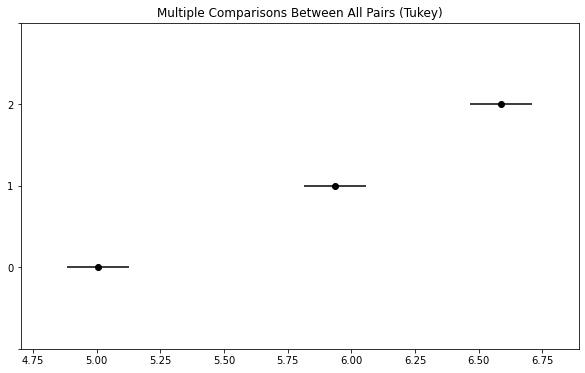

In [87]:
comp = mc.MultiComparison(iris_df['SepalLength'], iris_df['Species'])
tukeyhsd = comp.tukeyhsd(alpha=0.05)
tukeyhsd.summary()
print(tukeyhsd)
fig = tukeyhsd.plot_simultaneous()


In [ ]:
##### 2절 | 이원배치 분산분석

## Q1) R에 내장된 mtcars 데이터는 32개의 차종에 대한 다양한 특성과 단위 연료당 주행거리를 담고 있다. 
## am변수는 변속기 종류이며, cyl변수는 실린더의 개수를 의미한다. 
## 데이터를 분석에 적절한 형태로 전처리한 후, 변속기 종류(am변수)와 실린더의 개수(cyl변수)에 따라 
## 주행거리(mpg변수) 평균에 유의미한 차이가 존재하는지 이원 분산분석을 수행하고, 그 결과를 해석해보자.


In [97]:
cardf = pd.read_csv("C:/jocoding/mtcars.csv")

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

cardf.rename(columns = {'Unnamed: 0' : 'brand'}, inplace = True)

model = ols('mpg ~ C(cyl) * C(am)', cardf).fit()
anova_lm(model)

# cardf.head(4)

,df,sum_sq,mean_sq,F,PR(>F)
C(cyl),2.0,824.784590,412.392295,44.851657,3.725274e-09
C(am),1.0,36.766919,36.766919,3.998759,5.608373e-02
C(cyl):C(am),2.0,25.436511,12.718256,1.383233,2.686140e-01
Residual,26.0,239.059167,9.194583,NaN,NaN


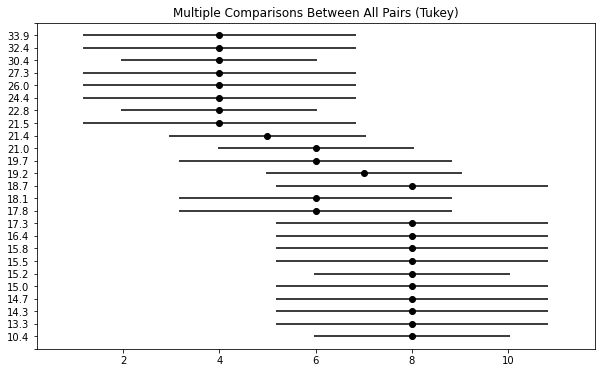

In [100]:
## Q2) 실린더 개수(cyl변수)와 변속기 종류(am변수) 사이에 상호작용 효과가 있는지 없는지를 
## 시각화해주는 상호작용 그래프를 그린 후 이를 해석해보자.
## ?? 상호작용 그래프...?

comp = mc.MultiComparison(cardf['cyl'], cardf['mpg'])
tukeyhsd = comp.tukeyhsd(alpha=0.05)
tukeyhsd.summary()
fig = tukeyhsd.plot_simultaneous()

In [ ]:
##### 5장. 상관분석

##### 3절 | 상관계수 검정

Q1) airquality 데이터는 뉴욕의 일일 대기 오염 정도에 대한 데이터로, 총6개의 변수로 이루어져 있다. 
6개의 변수 중 Month(월)과 Day(일)은 제외하고 Ozone(오존량), Solar.R(일사량), Wind(풍속), Temp(최고온도)만으로
 이루어진 데이터프레임 air를 생성하고, 네 가지 변수에 대한 상관계수를 산출해보자. 
 단, 모든 변수값에 NA가 없는 데이터들만 이용하여 피어슨, 스피어만, 켄달 상관계수를 모두 산출하여라.


In [120]:
airdf = pd.read_csv("C:/jocoding/airquality.csv")
air = pd.DataFrame()
air = airdf.iloc[:,:5]
air.corr(method='pearson')

,Unnamed: 0,Ozone,Solar.R,Wind,Temp
Unnamed: 0,1.000000,0.157191,-0.104682,-0.168683,0.385605
Ozone,0.157191,1.000000,0.348342,-0.601547,0.698360
Solar.R,-0.104682,0.348342,1.000000,-0.056792,0.275840
Wind,-0.168683,-0.601547,-0.056792,1.000000,-0.457988
Temp,0.385605,0.698360,0.275840,-0.457988,1.000000


In [121]:
airdf = airdf.iloc[:,:5]
airdf.isnull().sum()

Unnamed: 0     0
Ozone         37
Solar.R        7
Wind           0
Temp           0
dtype: int64

In [126]:
air_df = airdf.drop(['Ozone','Solar.R'], axis=1)
air_df.corr(method='pearson')

,Unnamed: 0,Wind,Temp
Unnamed: 0,1.000000,-0.168683,0.385605
Wind,-0.168683,1.000000,-0.457988
Temp,0.385605,-0.457988,1.000000


In [127]:
air_df.corr(method='spearman')

,Unnamed: 0,Wind,Temp
Unnamed: 0,1.000000,-0.146844,0.332880
Wind,-0.146844,1.000000,-0.446541
Temp,0.332880,-0.446541,1.000000


In [128]:
air_df.corr(method='kendall')

,Unnamed: 0,Wind,Temp
Unnamed: 0,1.000000,-0.100064,0.221896
Wind,-0.100064,1.000000,-0.322242
Temp,0.221896,-0.322242,1.000000


In [129]:
## Q2) air데이터 내의 네가지 변수 조합별 피어슨 상관계수를 그래프로 시각화해보자.

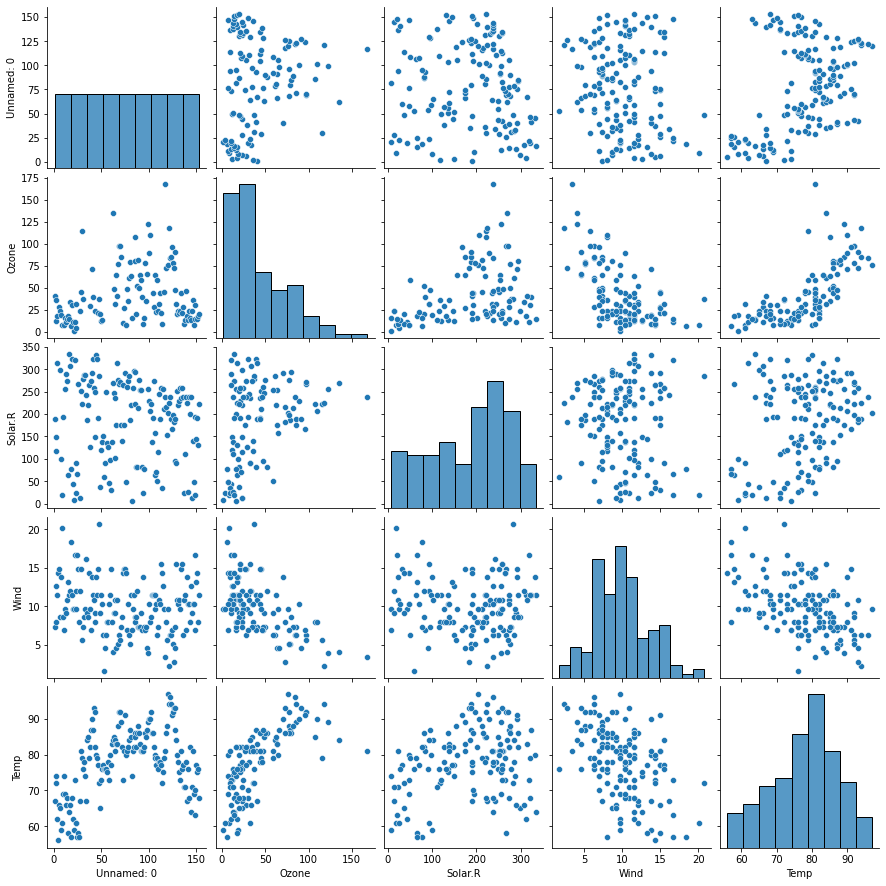

In [130]:
import seaborn as sns
sns.pairplot(airdf)

In [ ]:
## Q3) air데이터의 Ozone(오존량)와 Wind(풍속)변수에 대한 상관분석을 실시하고, 
## 피어슨 상관계수에 대한 검정 결과를 해석해보자. 

In [150]:
import scipy.stats

airrm = airdf.dropna(axis=0)
scipy.stats.pearsonr(airrm['Ozone'],airrm['Wind'])

# pvalue > 0.05 ... NaN 삭제로 문제생겼을수도

(-0.6124965763142117, 9.089415326542937e-13)

In [ ]:
6장. 회귀분석


2절 | 단순선형회귀분석

3. R을 이용한 단순선형회귀분석 
Q)  MASS패키지에서 제공하는 Cars93 데이터의 엔진크기(EngineSize)를 독립변수, 
가격(Price)를 종속변수로 설정하여 단순 선형 회귀분석을 실시한 후 추정된 회귀모형에 대해 해석해보자.


In [156]:
import seaborn as sns
from sklearn.linear_model import LinearRegression,Ridge, SGDRegressor # SGDRegressor은 학습 나머지는 공식
from sklearn.neural_network import MLPRegressor # MLPRegressor은 딥러닝 학습
from sklearn.metrics import r2_score # 선형 모델(Linear Models)
from sklearn.model_selection import train_test_split


carsdf = pd.read_csv("C:/jocoding/Cars93.csv")

cars93 = LinearRegression() # 카멜식 표기법 or 언더바 표기법 중 하나로 통일
cars93.fit(carsdf[['EngineSize']], carsdf['Price'])

print(cars93.intercept_)
print(cars93.coef_)

carsdf.columns

Index(['Unnamed: 0', 'Manufacturer', 'Model', 'Type', 'Min.Price', 'Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make'],
      dtype='object')

In [157]:
### 4. R을 이용한 선형회귀모형 진단
Q) 위 예제에서 생성한 선형회귀모델 Cars93_lm을 평가할 수 있는 
다양한 그래프를 생성한 후 해석해보자.


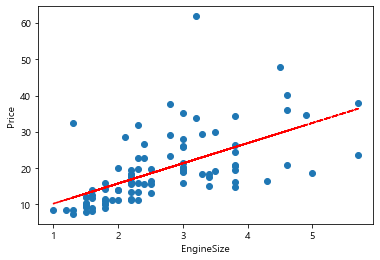

In [161]:
import mglearn 
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

plt.xlabel('EngineSize')
plt.ylabel('Price')
plt.scatter(carsdf['EngineSize'],carsdf['Price'])
plt.plot(carsdf['EngineSize'],cars93.predict(carsdf[['EngineSize']]),'r--') # 예측선
plt.show()

In [ ]:
### 5. 선형회귀모형을 활용한 예측
Q) MASS패키지에서 제공하는 Cars93 데이터의 엔진크기(EngineSize)를 독립변수, 
가격(Price)를 종속변수로 설정하여 회귀모형을 생성한 후, Cars93 데이터의 5개 행을 랜덤으로 뽑아 가격(Price)을 예측해보자. 
예측 시 predict 함수의 interval 인자값을 조정하며 그 결과를 비교해보자.


In [189]:
import random

y_data = carsdf['Price']
x_data = carsdf.iloc[:,random.sample(list(range(1,29)),5)]

# b = range(1,29)
# a = list(b)

x_data.head(7)

,Rev.per.mile,MPG.highway,EngineSize,DriveTrain,Fuel.tank.capacity
0,2890,31,1.8,Front,13.2
1,2335,25,3.2,Front,18.0
2,2280,26,2.8,Front,16.9
3,2535,26,2.8,Front,21.1
4,2545,30,3.5,Rear,21.1
5,2565,31,2.2,Front,16.4
6,1570,28,3.8,Front,18.0


In [195]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression,Ridge, SGDRegressor
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import cross_val_score

X = pd.get_dummies(x_data, columns=['DriveTrain']) 

model = make_pipeline(LinearRegression()) 
model.fit(X,y_data)

print(model.score(X,y_data),sep="\n")

r2Score = cross_val_score(model,X,y_data,cv=10,scoring='r2',verbose=1)
print(r2Score,sep="\n")
print(r2Score.mean())

0.5130580367518964


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[-0.40301136 -0.1147484   0.11572663 -0.59403466  0.73366868  0.66350073
  0.23752287  0.07023626  0.48607681  0.20653085]
0.14014684181781042


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


In [196]:
### 3절 | 다중선형회귀분석

### 3. 더미변수(dummy variable)
Q)  R에서 회귀모형을 생성하는 lm함수는 데이터에 범주형 변수가 포함되어 있을 경우, 
이를 자동으로 더미변수로 변환하여 회귀모형을 생성한다. 
이 과정을 더 자세히 이해하기 위해 범주형 변수(Spceies)가 포함된 iris데이터에서 
Petal.Length를 종속변수로 두고 나머지 변수들을 독립변수로 설정한 회귀모형을 생성하고 그 결과를 살펴보자.


In [168]:

### 4. R을 이용한 다중회귀분석
Q)  MASS패키지의 Cars93 데이터에서 엔진크기(EngineSize), RPM(RPM), 무게(Weight)를 독립변수로 설정하고 
자동차 가격(Price)를 종속변수로 설정하여 다변량 회귀분석을 수행한 뒤 그 결과를 해석해보자.


[28, 4, 24]

In [209]:
from sklearn.feature_selection import RFE
from sklearn.datasets import make_regression
import statsmodels.api as sm
import mglearn

xdata= carsdf[['EngineSize','RPM','Width','Length']]
ydata=carsdf['Price']

lm = LinearRegression()
Im.fit(xdata, ydata)
print(Im.coef_)
print(Im.intercept_, sep='\n')

rfe=RFE(lm, n_features_to_select = 1, step=1)
model = rfe.fit(xdata,ydata)

print(model.support_)
print(model.ranking_)
print(model.estimator_)
# U71401271, rpmoj 4, width 2 WH, length3번째로 유의함

[ 8.38063680e+00  7.13937639e-03 -6.54922886e-01  1.36675569e-01]
-20.15160884195411
[ True False False False]
[1 4 2 3]
LinearRegression()


In [238]:
#x_data = df[['EngineSize', 'RPM','Width', 'Length'j]
#y_data = df['price')

variables = carsdf.columns[[12,14,21,19]].tolist() ## 설명변수 리스트
y = carsdf['Price'] ## 반응변수
selected_variables = variables ## 초기에는 모든변수가 선택된 상태
sl_remove = 0.05
       
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정도니 결정계수
steps = [] ## 스텝
step = 0
       
       
while len(selected_variables) > 0:
    X = sm.add_constant(carsdf[selected_variables])
    p_vals = sm.OLS(y,X).fit().pvalues[1:] ## 절편항의 Pvalue는 뺀다.
    max_pval = p_vals.max() ## 최대 p-value
    if max_pval >= sl_remove: ## 최대 p-value이 기준값보다 크거나 같으면 제외
        remove_variable = p_vals.idxmax()
        selected_variables.remove(remove_variable)
        step +=1
        steps.append(step)
        adj_s_squared = sm.OLS(y,sm.add_constant(df[selected_variables])),fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break
selected_yariables

KeyError: "None of [Index(['EngineSize', 'RPM', 'Length'], dtype='object')] are in the [columns]"

In [ ]:
Q2) MASS 패키지의 Cars93 데이터에서 엔진크기(EngineSize), 마력(Horsepower), RPM(RPM), 너비(Width), 
길이(Length), 무게(Weight)를 독립변수로 가지고, 자동차의 가격(Price)를 종속변수로 가지는 선형회귀모형을 생성해보자. 
그 후 step함수를 사용해 ‘후진제거법’으로 변수 선택을 수행한 후 결과를 해석해보자.


In [235]:
x_data2 = carsdf[['EngineSize', 'RPM','Width','Length','Horsepower','Weight']]
y_data2 = carsdf['Price']
# x_data2.shape

lm2 = LinearRegression()
lm2.fit(x_data2, y_data2)
print(lm2.coef_)
print(lm2.intercept_, sep='\n')

rfe2 = RFE(Im2, n_features_to_select = 1, step=1)
model2 = rfe2.fit(x_data2,y_data2)
print(model2.support_)
print(model2.ranking_)
print(model2.estimator_)

[ 4.05792236e-01 -1.57501855e-03 -1.71498517e+00  1.52836848e-01
  1.41608634e-01  6.58613350e-03]
77.11744483543065
[ True False False False False False]
[1 6 2 3 4 5]
LinearRegression()
